<a href="https://colab.research.google.com/github/VishalGaurav1/Time-Series-Forecasting/blob/main/TimeSeriesForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re
import os
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
!gdown 1RPOLd_74kMrpkTg35X843hOrZIsSJSMF

Downloading...
From: https://drive.google.com/uc?id=1RPOLd_74kMrpkTg35X843hOrZIsSJSMF
To: /content/train_1.csv
100% 278M/278M [00:02<00:00, 94.5MB/s]


In [5]:
train=pd.read_csv('train_1.csv')
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [6]:
train.shape

(145063, 551)

Analysing the Missing Values

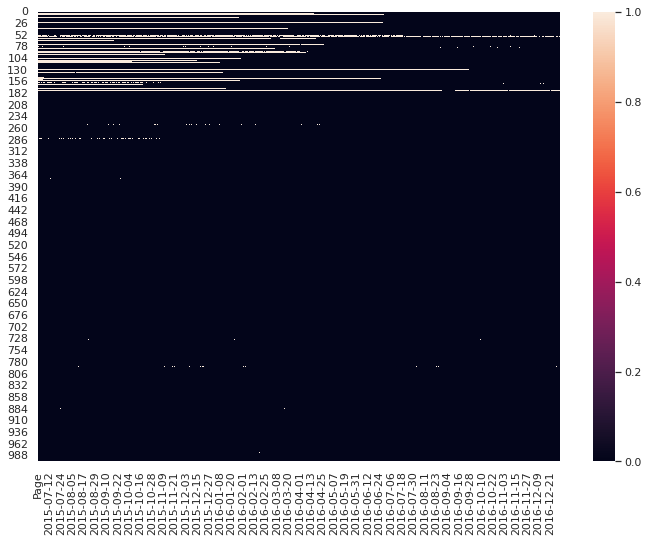

In [7]:
import seaborn as sns
sns.heatmap(train.head(1000).isna())#Assumption-There are large number of missing values till a date for every page because till that date,that webpage was
#not in existence.

Finding the Total Number of Missing Values for Every Day

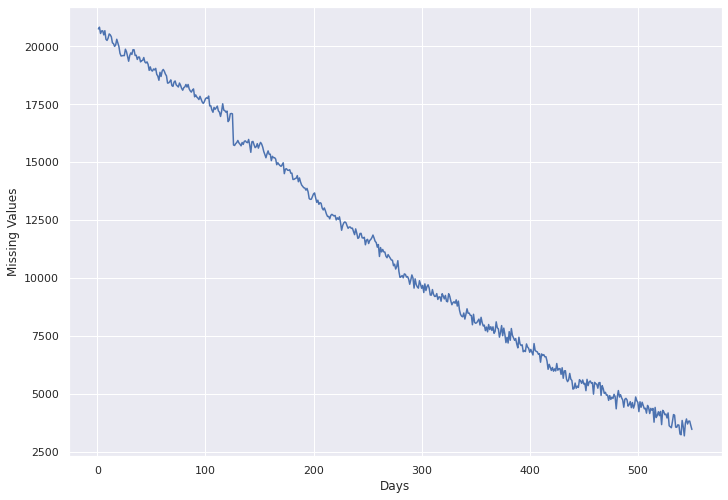

In [8]:
import matplotlib.pyplot as plt
x=[i for i in range(1,train.shape[1])]
y=[train.iloc[:,1+i].isnull().sum() for i in range(len(x))]
plt.plot(x,y)
plt.xlabel('Days')
plt.ylabel('Missing Values')
plt.show()#Conclusion-The number of Missing Values decrease with increase in Time.Thus validates our Hypothesis that there were large number of Missing
#Values in the Initial Days due to non-existence of those pages.

In [9]:
xtrain=train.dropna(thresh=300)
xtrain.shape

(133617, 551)

In [10]:
xtrain.isnull().sum()

Page             0
2015-07-01    9666
2015-07-02    9683
2015-07-03    9442
2015-07-04    9561
              ... 
2016-12-27     901
2016-12-28     943
2016-12-29     959
2016-12-30     941
2016-12-31     677
Length: 551, dtype: int64

Filling the Missing Values with 0

In [11]:
xtrain.fillna(0,inplace=True)
xtrain.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0


Extracting the Language from the Page Column

In [12]:
import re
pattern='_([a-z]+).wikipedia.org'
def lang(col):
  y=re.search(pattern,str(col))
  if y:
    return y.group(1)
  return 'No Lang'
xtrain['Language']=xtrain.apply(lambda x:lang(x['Page']),axis=1)

In [13]:
xtrain['Language'].unique()

array(['zh', 'fr', 'en', 'No Lang', 'ru', 'de', 'ja', 'es'], dtype=object)

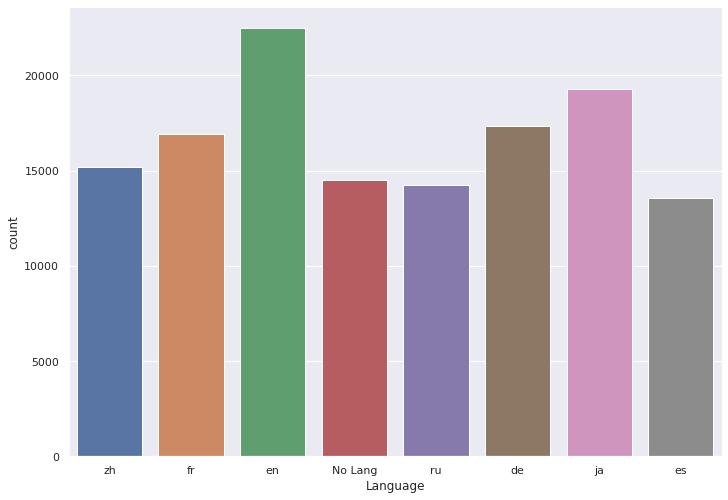

In [14]:
sns.countplot(xtrain['Language'])

In [15]:
df_Language=xtrain.groupby('Language').mean().transpose()
df_Language.head()

Language,No Lang,de,en,es,fr,ja,ru,zh
2015-07-01,102.733545,763.765926,3767.328604,1127.485204,499.092872,614.637160,663.199229,272.498521
2015-07-02,107.663447,753.362861,3755.158765,1077.485425,502.297852,705.813216,674.677015,272.906778
2015-07-03,101.769629,723.074415,3565.225696,990.895949,483.007553,637.451671,625.329783,271.097167
2015-07-04,86.853871,663.537323,3711.782932,930.303151,516.275785,800.897435,588.171829,273.712379
2015-07-05,96.254105,771.358657,3833.433025,1011.759575,506.871666,768.352319,626.385354,291.977713


In [16]:
df_Language.reset_index(inplace=True)

In [17]:
df_Language.set_index('index',inplace=True)
df_Language

Language,No Lang,de,en,es,fr,ja,ru,zh
index,,,,,,,,
2015-07-01,102.733545,763.765926,3767.328604,1127.485204,499.092872,614.637160,663.199229,272.498521
2015-07-02,107.663447,753.362861,3755.158765,1077.485425,502.297852,705.813216,674.677015,272.906778
2015-07-03,101.769629,723.074415,3565.225696,990.895949,483.007553,637.451671,625.329783,271.097167
2015-07-04,86.853871,663.537323,3711.782932,930.303151,516.275785,800.897435,588.171829,273.712379
2015-07-05,96.254105,771.358657,3833.433025,1011.759575,506.871666,768.352319,626.385354,291.977713
...,...,...,...,...,...,...,...,...
2016-12-27,155.270181,1119.596936,6314.335275,1070.923400,840.590217,808.541436,998.374071,363.066991
2016-12-28,178.561267,1062.284069,6108.874144,1108.996753,783.585379,807.430163,945.054730,369.049701
2016-12-29,150.873534,1033.939062,6518.058525,1058.660320,763.209169,883.752786,909.352207,340.526330


Text(0, 0.5, 'Views Per Page')

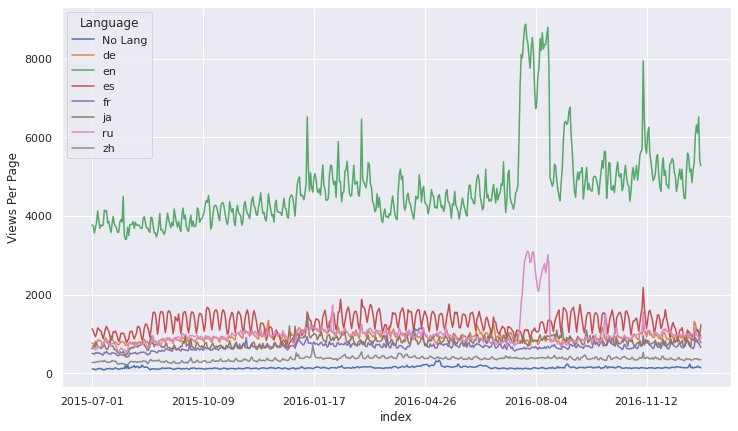

In [18]:
df_Language.plot(figsize=(12,7))
plot.ylabel('Views Per Page')

In [19]:
total_view=df_Language.copy()

In [20]:
from statsmodels.tsa.stattools import adfuller
def ad_fuller(x):
  result=adfuller(x)
  print('ADF Stastistic',result[0])
  print('p value',result[1])

In [21]:
ad_fuller(total_view['en'])#Since p value>5%(taking 95% Confidence),we cant reject Null Hypothesis i.e. Its a non-stationary dataset.

ADF Stastistic -2.373562974569941
p value 0.14933749437355304


In [22]:
ts_en=total_view['en']

Doing the Time Series decomposition for the English Language

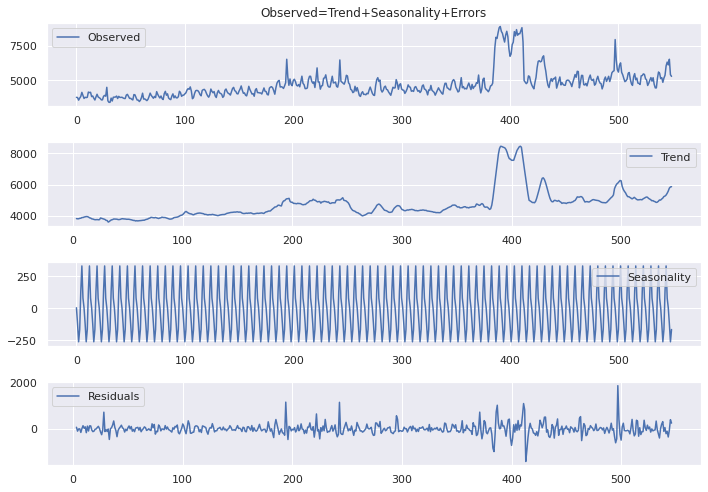

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(ts_en.values,model='additive',period=7)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plot.figure(figsize=(10,7))
plot.subplot(411)
plot.title('Observed=Trend+Seasonality+Errors')
plot.plot(ts_en.values,label='Observed')
plot.legend(loc='best')
plot.subplot(412)
plot.plot(trend, label='Trend')
plot.legend(loc='best')
plot.subplot(413)
plot.plot(seasonal,label='Seasonality')
plot.legend(loc='best')
plot.subplot(414)
plot.plot(residual, label='Residuals')
plot.legend(loc='best')
plot.tight_layout()
plot.show()

DeTrending the English data

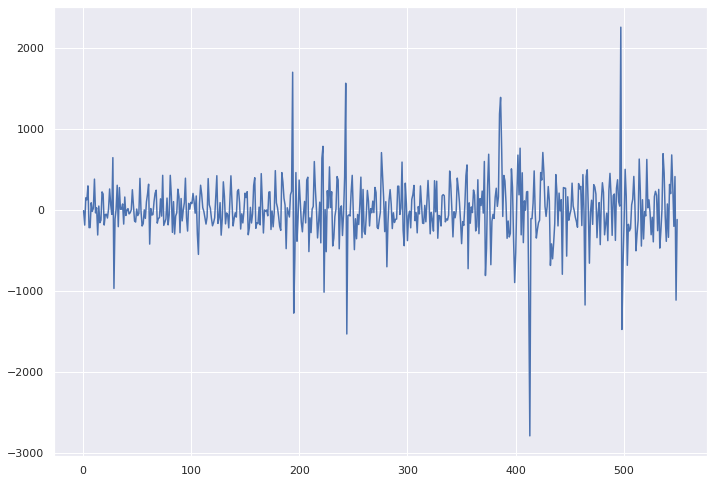

In [24]:
ts_diff=ts_en-ts_en.shift(1)
plot.plot(ts_diff.values)
plot.show()

In [25]:
ts_diff.dropna(inplace=True)
ad_fuller(ts_diff)#Since p value<1%(taking 95% Confidence),we cant accept the Null Hypothesis i.e. Its a stationary time series.

ADF Stastistic -8.273590058493824
p value 4.721271966433523e-13


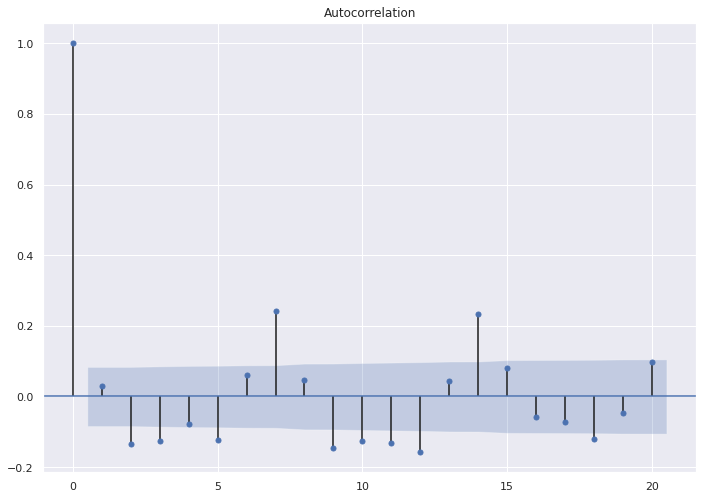

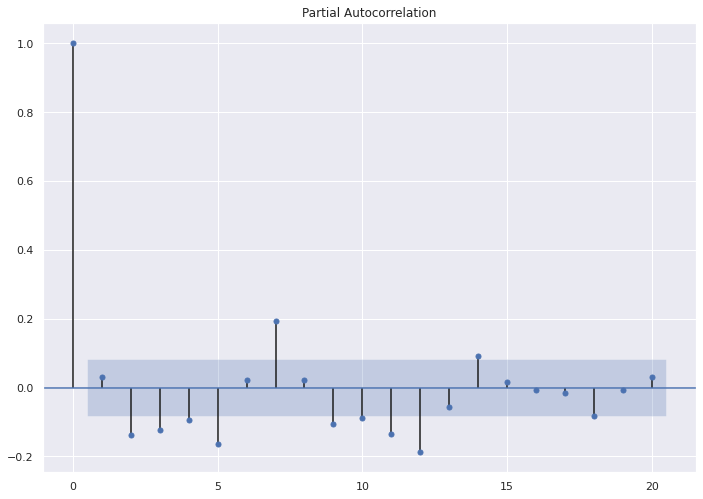

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf=plot_acf(ts_diff,lags=20)
pacf=plot_pacf(ts_diff,lags=20)

Performing ARIMA using Grid Search for English Language

In [27]:
from statsmodels.tsa.arima_model import ARIMA
def grid_search(ts):
    v=[0,1,2,3]
    mape=150
    val=[0,0,0]
    for p in v:
        for d in v:
            for q in v:
                try:
                    model = ARIMA(ts[:-30], order=(p,d,q))
                    model_fit = model.fit(disp=-1)
                    fc, se, conf = model_fit.forecast(30, alpha=0.02)
                    x = np.mean(np.abs(fc - ts[-30:].values)/np.abs(ts[-30:].values))
                    if(x<mape):
                        mape=x
                        val=[p,d,q]
                    print(mape)

                except:
                    pass

    return(mape, val)

In [28]:
grid_search(ts_en)#Best parameter values for p,d,q-[2,1,2] and mape=0.06

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.1099479749615083
0.1099479749615083
0.1098894865580363


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.10985379661655534
0.09191702045439672
0.09191702045439672
0.08442766793969758


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

0.07999883649808552
0.07999883649808552
0.07999883649808552


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

0.07999883649808552


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.07999883649808552
0.07999883649808552
0.07999883649808552


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.07999883649808552


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.07999883649808552
0.07999883649808552


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.07999883649808552


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.07029601931895765


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.07029601931895765
0.07029601931895765


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

0.07029601931895765


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.07029601931895765


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.07029601931895765


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.07029601931895765
0.07029601931895765


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.07029601931895765


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.06365999777284263


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.06365999777284263
0.06365999777284263


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.06365999777284263


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.06365999777284263


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.06365999777284263


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.06365999777284263


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.06365999777284263


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmo

0.06365999777284263
0.06365999777284263
0.06365999777284263


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.06365999777284263


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

0.06365999777284263
0.06365999777284263


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.06365999777284263


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(0.06365999777284263, [2, 1, 2])

Plotting the Forecasting Vs Actual for best values of p,d,q in ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


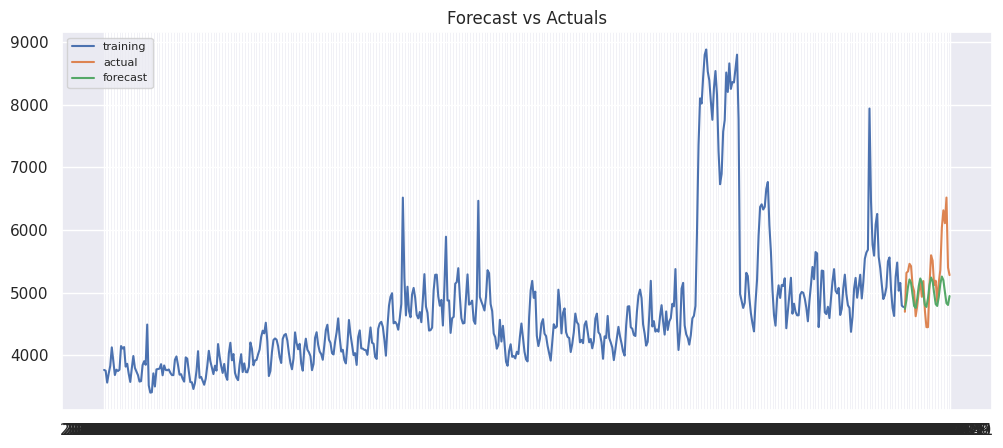

In [29]:
model = ARIMA(ts_en[:-30], order=(2, 1, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(30, alpha=0.02)  

# Make as pandas series
fc_series = pd.Series(fc, index=ts_en[-30:].index)
# Plot
plot.figure(figsize=(12,5), dpi=100)
plot.plot(ts_en[:-30], label='training')
plot.plot(ts_en[-30:], label='actual')
plot.plot(fc_series, label='forecast')

plot.title('Forecast vs Actuals')
plot.legend(loc='upper left', fontsize=8)

Introducing the Exogeneos Variable-Binary Variable where 1 denotes the date at which the Campaign was launched and 0 otherwise

In [30]:
!gdown 1c2qOXLg4zfznv0EJKvjdR-UUp2GVpTSc

Downloading...
From: https://drive.google.com/uc?id=1c2qOXLg4zfznv0EJKvjdR-UUp2GVpTSc
To: /content/Exog_Campaign_eng
100% 1.10k/1.10k [00:00<00:00, 1.36MB/s]


In [31]:
ex_df = pd.read_csv('Exog_Campaign_eng')
ex_df.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [32]:
ex_df.value_counts()

Exog
0       496
1        54
dtype: int64

In [33]:
exog=ex_df['Exog'].to_numpy()

Making SARIMAX Model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


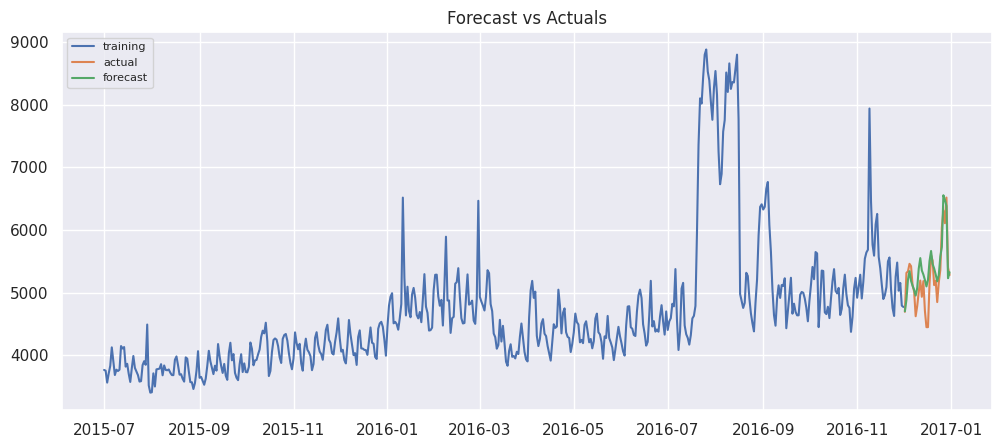

In [34]:
import statsmodels.api as sm
train=ts_en[:520]
test=ts_en[520:]
model=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,7),exog=exog[:520])
results=model.fit()

fc=results.forecast(30,dynamic=True,exog=pd.DataFrame(exog[520:]))

# Make as pandas series
fc_series = pd.Series(fc)
# Plot
train.index=train.index.astype('datetime64[ns]')
test.index=test.index.astype('datetime64[ns]')
plot.figure(figsize=(12,5), dpi=100)
plot.plot(train, label='training')
plot.plot(test, label='actual')
plot.plot(fc_series, label='forecast')

plot.title('Forecast vs Actuals')
plot.legend(loc='upper left', fontsize=8)

In [35]:
mape = np.mean(np.abs(fc - test.values)/np.abs(test.values))
print("mape:",mape)#Gives lowest mape of 4.9%

mape: 0.04940842517414524
